# Eagle work for "NL G1_1433" 
### target is Fan speed, fan current, A090 and T010; 
### what is value of fan current ?????
### what factor affecting fan current to change


### fan current data is half as compared to other ????



In [1]:
# Required Imports 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#creating dataframe df1 of "NL I09"
df1 = pd.read_csv("./Eagle NL units/NL G1_1433.csv")

C:\Users\muhammad.tahir.ctr\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,18,20,22,23,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#readong first 5 rows of "NL I09"
df1.head()

,Time,Date,TEMP__IN,TEMP_OUT,TEMPHTX1,WHTRSETP,FLOW_GPM,BYPRATIO,FAN__SPD,BURNSTGE,...,ALARM1 DESC,ALARM2 DESC,ALERT1 CODE,ALERT2 CODE,ALERT1 DESC,ALERT2 DESC,ALARM1 COUNT,ALARM2 COUNT,ALERT1 COUNT,ALERT2 COUNT
0,02:49:45 PM,12/15/2020,46.4,137.1,137.3,140,3.7,0,5399,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02:50:15 PM,12/15/2020,46.6,137.1,137.3,140,3.8,0,5399,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02:50:45 PM,12/15/2020,46.6,137.1,137.7,140,3.8,1,5395,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,02:51:15 PM,12/15/2020,46.6,55.0,52.2,140,6.2,0,4743,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,02:51:45 PM,12/15/2020,47.5,61.0,67.3,140,0.0,32,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df1.loc[df1.FAN__SPD.isnull()]

,Time,Date,TEMP__IN,TEMP_OUT,TEMPHTX1,WHTRSETP,FLOW_GPM,BYPRATIO,FAN__SPD,BURNSTGE,...,ALARM1 DESC,ALARM2 DESC,ALERT1 CODE,ALERT2 CODE,ALERT1 DESC,ALERT2 DESC,ALARM1 COUNT,ALARM2 COUNT,ALERT1 COUNT,ALERT2 COUNT
851140,09:26:02 AM,7/14/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
851141,09:27:11 AM,7/14/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
851142,09:27:27 AM,7/14/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df1 = df1.loc[df1.FAN__SPD.notnull()]

In [6]:
# looking at null values and data types of each column for "NL I09"
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1170012 entries, 0 to 1170014
Data columns (total 30 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Time          1170012 non-null  object 
 1   Date          1170012 non-null  object 
 2   TEMP__IN      1170012 non-null  object 
 3   TEMP_OUT      1170012 non-null  object 
 4   TEMPHTX1      1170012 non-null  object 
 5   WHTRSETP      1167409 non-null  object 
 6   FLOW_GPM      1170012 non-null  object 
 7   BYPRATIO      1170012 non-null  object 
 8   FAN__SPD      1170012 non-null  object 
 9   BURNSTGE      941247 non-null   object 
 10  FLM_ROD1      826423 non-null   object 
 11  ALARM_01      748373 non-null   object 
 12  ALARM_02      748373 non-null   object 
 13  FAN_CURR      710810 non-null   object 
 14  IGN_FIGN      710810 non-null   object 
 15  INSTANCE      1170012 non-null  int64  
 16  Unit_Name     1170012 non-null  int64  
 17  Station       1170012 non-n

In [7]:
df3 = df1[['Time', 'Date', 'TEMP__IN', 'TEMP_OUT', 'TEMPHTX1', 'WHTRSETP',
       'FLOW_GPM', 'BYPRATIO', 'FAN__SPD', 'BURNSTGE', 'FLM_ROD1', 'ALARM_01',
       'ALARM_02', 'FAN_CURR', 'IGN_FIGN']]
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1170012 entries, 0 to 1170014
Data columns (total 15 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   Time      1170012 non-null  object
 1   Date      1170012 non-null  object
 2   TEMP__IN  1170012 non-null  object
 3   TEMP_OUT  1170012 non-null  object
 4   TEMPHTX1  1170012 non-null  object
 5   WHTRSETP  1167409 non-null  object
 6   FLOW_GPM  1170012 non-null  object
 7   BYPRATIO  1170012 non-null  object
 8   FAN__SPD  1170012 non-null  object
 9   BURNSTGE  941247 non-null   object
 10  FLM_ROD1  826423 non-null   object
 11  ALARM_01  748373 non-null   object
 12  ALARM_02  748373 non-null   object
 13  FAN_CURR  710810 non-null   object
 14  IGN_FIGN  710810 non-null   object
dtypes: object(15)
memory usage: 142.8+ MB


In [8]:
df3.columns

Index(['Time', 'Date', 'TEMP__IN', 'TEMP_OUT', 'TEMPHTX1', 'WHTRSETP',
       'FLOW_GPM', 'BYPRATIO', 'FAN__SPD', 'BURNSTGE', 'FLM_ROD1', 'ALARM_01',
       'ALARM_02', 'FAN_CURR', 'IGN_FIGN'],
      dtype='object')

In [9]:
df3['date_time'] = df1['Date'] + ' ' + df1['Time']

<ipython-input-9-011325a8cfc6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['date_time'] = df1['Date'] + ' ' + df1['Time']


In [10]:
#df1['Date/Time'].head()

In [11]:
#df1['Date/Time'] = pd.to_datetime(df1['Date/Time'])

In [12]:
#df1['Date/Time'].head()

In [13]:
#df2 = df1[['date_time', 'FAN__SPD', 'FAN_CURR', 'ALARM_01', 'ALARM_02']]
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1170012 entries, 0 to 1170014
Data columns (total 16 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Time       1170012 non-null  object
 1   Date       1170012 non-null  object
 2   TEMP__IN   1170012 non-null  object
 3   TEMP_OUT   1170012 non-null  object
 4   TEMPHTX1   1170012 non-null  object
 5   WHTRSETP   1167409 non-null  object
 6   FLOW_GPM   1170012 non-null  object
 7   BYPRATIO   1170012 non-null  object
 8   FAN__SPD   1170012 non-null  object
 9   BURNSTGE   941247 non-null   object
 10  FLM_ROD1   826423 non-null   object
 11  ALARM_01   748373 non-null   object
 12  ALARM_02   748373 non-null   object
 13  FAN_CURR   710810 non-null   object
 14  IGN_FIGN   710810 non-null   object
 15  date_time  1170012 non-null  object
dtypes: object(16)
memory usage: 151.8+ MB


In [14]:
df3['ALARM_01'].unique()

array([nan, '---', 'T010 Warning - Blower Motor Not Vent. Enough    ',
       'T01L Lime Build-Up Detected in Heat Exchanger   ',
       '                                                ',
       'A011 Flame Rod Does Not Detect Flame            ',
       'A017 Water Leak Detected                        ',
       'A090 Blockage in Venting Detected               '], dtype=object)

In [15]:
df3['ALARM_01'].value_counts()

T01L Lime Build-Up Detected in Heat Exchanger       321006
---                                                 317575
T010 Warning - Blower Motor Not Vent. Enough         70721
A090 Blockage in Venting Detected                    38668
                                                       261
A017 Water Leak Detected                               139
A011 Flame Rod Does Not Detect Flame                     3
Name: ALARM_01, dtype: int64

In [16]:
df3 = df3.dropna()

In [17]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708207 entries, 189717 to 1170014
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Time       708207 non-null  object
 1   Date       708207 non-null  object
 2   TEMP__IN   708207 non-null  object
 3   TEMP_OUT   708207 non-null  object
 4   TEMPHTX1   708207 non-null  object
 5   WHTRSETP   708207 non-null  object
 6   FLOW_GPM   708207 non-null  object
 7   BYPRATIO   708207 non-null  object
 8   FAN__SPD   708207 non-null  object
 9   BURNSTGE   708207 non-null  object
 10  FLM_ROD1   708207 non-null  object
 11  ALARM_01   708207 non-null  object
 12  ALARM_02   708207 non-null  object
 13  FAN_CURR   708207 non-null  object
 14  IGN_FIGN   708207 non-null  object
 15  date_time  708207 non-null  object
dtypes: object(16)
memory usage: 91.9+ MB


In [18]:
df3['ALARM_01'].value_counts()

---                                                 314972
T01L Lime Build-Up Detected in Heat Exchanger       310790
T010 Warning - Blower Motor Not Vent. Enough         43376
A090 Blockage in Venting Detected                    38668
                                                       261
A017 Water Leak Detected                               139
A011 Flame Rod Does Not Detect Flame                     1
Name: ALARM_01, dtype: int64

In [19]:
df3['FAN__SPD'].value_counts()

---     314972
0        92692
5399     59575
0        55292
5403     33457
         ...  
401          1
1418         1
399          1
1415         1
359          1
Name: FAN__SPD, Length: 4519, dtype: int64

In [20]:
df3.drop(df3[df3['FAN__SPD']=='---'].index, inplace = True)

In [21]:
df3['FAN__SPD'] = df3['FAN__SPD'].astype(int)

In [22]:
df3['FAN__SPD'].dtype

dtype('int32')

In [23]:
df3['FAN_CURR'].value_counts()

22.9     30194
24.0     15090
23.9     13550
27.2     13089
23.9      9097
         ...  
252.4        1
166.9        1
172.1        1
111.8        1
236.2        1
Name: FAN_CURR, Length: 3873, dtype: int64

In [24]:
df3['FAN_CURR'] = df3['FAN_CURR'].astype(float)

In [25]:
df3['FAN_CURR'].dtype

dtype('float64')

In [26]:
df3['ALARM_01'].value_counts()

T01L Lime Build-Up Detected in Heat Exchanger       310790
T010 Warning - Blower Motor Not Vent. Enough         43376
A090 Blockage in Venting Detected                    38668
                                                       261
A017 Water Leak Detected                               139
A011 Flame Rod Does Not Detect Flame                     1
Name: ALARM_01, dtype: int64

In [27]:
df3['ALARM_01'].unique()

array(['T010 Warning - Blower Motor Not Vent. Enough    ',
       'T01L Lime Build-Up Detected in Heat Exchanger   ',
       '                                                ',
       'A011 Flame Rod Does Not Detect Flame            ',
       'A017 Water Leak Detected                        ',
       'A090 Blockage in Venting Detected               '], dtype=object)

In [28]:
#df2['alarm_t010'] = df2[df2['ALARM_01']=='T010 Warning - Blower Motor Not Vent. Enough    ']

In [29]:
#display 1 when the alarm is present in ALARM_01 and 0 if it is absent
df3['alarm_t010'] = np.where(df3['ALARM_01'].str.contains('T010'), 1, 0)
df3['alarm_a090'] = np.where(df3['ALARM_01'].str.contains('A090'), 1, 0)
#display 1 only at the time the alarm activates (show only the first iteration of the alarm)
df3['alarm_t010'] = np.where((df3.alarm_t010==1) & (df3.alarm_t010.shift()==0), 1, 0)
df3['alarm_a090'] = np.where((df3.alarm_a090==1) & (df3.alarm_a090.shift()==0), 1, 0)

In [30]:
df3['ALARM_02'].value_counts()

                                                    354427
T01L Lime Build-Up Detected in Heat Exchanger        38808
Name: ALARM_02, dtype: int64

In [31]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393235 entries, 189717 to 957220
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Time        393235 non-null  object 
 1   Date        393235 non-null  object 
 2   TEMP__IN    393235 non-null  object 
 3   TEMP_OUT    393235 non-null  object 
 4   TEMPHTX1    393235 non-null  object 
 5   WHTRSETP    393235 non-null  object 
 6   FLOW_GPM    393235 non-null  object 
 7   BYPRATIO    393235 non-null  object 
 8   FAN__SPD    393235 non-null  int32  
 9   BURNSTGE    393235 non-null  object 
 10  FLM_ROD1    393235 non-null  object 
 11  ALARM_01    393235 non-null  object 
 12  ALARM_02    393235 non-null  object 
 13  FAN_CURR    393235 non-null  float64
 14  IGN_FIGN    393235 non-null  object 
 15  date_time   393235 non-null  object 
 16  alarm_t010  393235 non-null  int32  
 17  alarm_a090  393235 non-null  int32  
dtypes: float64(1), int32(3), object(14)
mem

In [32]:
df3['alarm_t010'] = np.where(df3['ALARM_01'].str.contains('T010'), 1, 0)

In [33]:
df3.date_time=pd.to_datetime(df3.date_time, format='%m/%d/%Y %I:%M:%S %p')
df3.sort_values(by=['date_time'], inplace=True)
df3.reset_index(drop=True, inplace=True)

In [34]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393235 entries, 0 to 393234
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Time        393235 non-null  object        
 1   Date        393235 non-null  object        
 2   TEMP__IN    393235 non-null  object        
 3   TEMP_OUT    393235 non-null  object        
 4   TEMPHTX1    393235 non-null  object        
 5   WHTRSETP    393235 non-null  object        
 6   FLOW_GPM    393235 non-null  object        
 7   BYPRATIO    393235 non-null  object        
 8   FAN__SPD    393235 non-null  int32         
 9   BURNSTGE    393235 non-null  object        
 10  FLM_ROD1    393235 non-null  object        
 11  ALARM_01    393235 non-null  object        
 12  ALARM_02    393235 non-null  object        
 13  FAN_CURR    393235 non-null  float64       
 14  IGN_FIGN    393235 non-null  object        
 15  date_time   393235 non-null  datetime64[ns]
 16  al

In [35]:
df3 = df3.drop(['ALARM_01', 'ALARM_02', 'Date', 'Time'], axis=1)

In [36]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393235 entries, 0 to 393234
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   TEMP__IN    393235 non-null  object        
 1   TEMP_OUT    393235 non-null  object        
 2   TEMPHTX1    393235 non-null  object        
 3   WHTRSETP    393235 non-null  object        
 4   FLOW_GPM    393235 non-null  object        
 5   BYPRATIO    393235 non-null  object        
 6   FAN__SPD    393235 non-null  int32         
 7   BURNSTGE    393235 non-null  object        
 8   FLM_ROD1    393235 non-null  object        
 9   FAN_CURR    393235 non-null  float64       
 10  IGN_FIGN    393235 non-null  object        
 11  date_time   393235 non-null  datetime64[ns]
 12  alarm_t010  393235 non-null  int32         
 13  alarm_a090  393235 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(3), object(9)
memory usage: 37.5+ MB


In [37]:
#checking null values
df3.isnull().sum()

TEMP__IN      0
TEMP_OUT      0
TEMPHTX1      0
WHTRSETP      0
FLOW_GPM      0
BYPRATIO      0
FAN__SPD      0
BURNSTGE      0
FLM_ROD1      0
FAN_CURR      0
IGN_FIGN      0
date_time     0
alarm_t010    0
alarm_a090    0
dtype: int64

In [38]:
#df2 = df2.dropna(axis=1)

In [39]:
#df2.dropna(axis=0, how='any')
#df2.info()
#df2.dropna(subset=df2.select_dtypes(np.floating).columns, how='all')
#df2.loc[:,~df2.replace('nan',np.nan).isna().all()]

In [40]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393235 entries, 0 to 393234
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   TEMP__IN    393235 non-null  object        
 1   TEMP_OUT    393235 non-null  object        
 2   TEMPHTX1    393235 non-null  object        
 3   WHTRSETP    393235 non-null  object        
 4   FLOW_GPM    393235 non-null  object        
 5   BYPRATIO    393235 non-null  object        
 6   FAN__SPD    393235 non-null  int32         
 7   BURNSTGE    393235 non-null  object        
 8   FLM_ROD1    393235 non-null  object        
 9   FAN_CURR    393235 non-null  float64       
 10  IGN_FIGN    393235 non-null  object        
 11  date_time   393235 non-null  datetime64[ns]
 12  alarm_t010  393235 non-null  int32         
 13  alarm_a090  393235 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(3), object(9)
memory usage: 37.5+ MB


In [41]:
for col in df3.columns:
    print(col, ':')
    print(df3[col].unique())

TEMP__IN :
['46.8' '47.3' '46.9' '49.1' '51.1' '52.2' '53.1' '53.2' '53.8' '54.1'
 '54.3' '54.7' '54.9' '55.0' '55.2' '47.5' '49.6' '51.4' '52.3' '54.0'
 '48.0' '47.7' '51.3' '49.5' '53.4' '49.8' '52.5' '52.9' '50.7' '51.6'
 '48.4' '50.2' '48.2' '46.6' '50.4' '48.9' '52.0' '48.7' '50.5' '46.4'
 '55.6' '55.8' '55.9' '56.1' '56.5' '56.7' '56.8' '57.0' '57.4' '57.6'
 '57.7' '57.9' '58.3' '58.5' '58.6' '58.8' '59.0' '59.4' '59.5' '59.7'
 '59.9' '60.1' '60.4' '60.6' '60.8' '61.0' '61.2' '61.3' '61.7' '61.9'
 '62.1' '62.2' '62.4' '46.0' '45.7' '45.9' '45.3' '45.1' '44.6' '45.0'
 46.6 46.8 48.7 52.0 54.1 55.8 56.5 57.4 57.7 58.5 58.6 59.4 59.5 59.7
 48.0 46.4 55.6 57.9 58.3 47.7 46.9 48.4 52.2 56.7 57.6 58.8 48.2 47.3
 48.9 52.5 54.7 56.1 56.8 59.0 60.1 47.5 57.0 49.1 52.3 54.3 49.6 54.9
 55.9 59.9 49.5 54.0 55.2 52.9 49.8 50.2 53.1 46.0 50.4 53.2 51.3 50.5
 50.7 51.1 53.4 51.4 53.8 55.0 51.6 60.4 60.6 60.8 61.0 61.2 61.3 61.7
 61.9 62.1 45.9 45.7 45.3 45.1 62.4 62.2 62.8 63.0 63.1 63.3 63.5 

In [42]:
df3['FLM_ROD1'].value_counts()

Flame Present       227789
No Flame Present    165446
Name: FLM_ROD1, dtype: int64

In [43]:
df3['TEMP__IN'] = df3['TEMP__IN'].astype(float)

In [44]:
df3['BURNSTGE'].dtype

dtype('O')

In [45]:
df3['TEMP_OUT'] = df3['TEMP_OUT'].astype(float)

In [46]:

df3['TEMPHTX1'] = df3['TEMPHTX1'].astype(float)

In [47]:
df3['WHTRSETP'] = df3['WHTRSETP'].astype(float)

In [48]:
df3['FLOW_GPM'] = df3['FLOW_GPM'].astype(float)

In [49]:
df3['BYPRATIO'] = df3['BYPRATIO'].astype(float)

In [50]:
df3['BURNSTGE'] = df3['BURNSTGE'].astype(float)

In [51]:
#df3['FLM_ROD1'] = df3['FLM_ROD1'].astype(float)

# to change labels of "'VLVSTATE"

FLM_ROD1_dict = {
    'Flame Present': 1,
    'No Flame Present': 0
}

df3["FLM_ROD1"] = df3["FLM_ROD1"].map(FLM_ROD1_dict)

In [52]:
df3['IGN_FIGN'] = df3['IGN_FIGN'].astype(float)

In [53]:
df3['WHTRSETP'].value_counts()

140.0    393235
Name: WHTRSETP, dtype: int64

In [54]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393235 entries, 0 to 393234
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   TEMP__IN    393235 non-null  float64       
 1   TEMP_OUT    393235 non-null  float64       
 2   TEMPHTX1    393235 non-null  float64       
 3   WHTRSETP    393235 non-null  float64       
 4   FLOW_GPM    393235 non-null  float64       
 5   BYPRATIO    393235 non-null  float64       
 6   FAN__SPD    393235 non-null  int32         
 7   BURNSTGE    393235 non-null  float64       
 8   FLM_ROD1    393235 non-null  int64         
 9   FAN_CURR    393235 non-null  float64       
 10  IGN_FIGN    393235 non-null  float64       
 11  date_time   393235 non-null  datetime64[ns]
 12  alarm_t010  393235 non-null  int32         
 13  alarm_a090  393235 non-null  int32         
dtypes: datetime64[ns](1), float64(9), int32(3), int64(1)
memory usage: 37.5 MB


In [ ]:
# bar chart to see missing visual in df_data
plt.figure(figsize = (10,10))

df3.isnull().sum().plot(kind = 'barh')
plt.title('Number of Missing Values by Column', size = 25)
plt.xlabel('Count', size = 25);

In [ ]:
df3['FAN__SPD'].hist()

In [ ]:
df3['FAN_CURR'].hist()

In [ ]:
#visual of correlation between fields or columns
plt.figure(figsize=(10, 10))
mask = np.zeros_like(df3.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df3.corr(), mask = mask, square = True, cmap = 'viridis', annot = True, vmin=-1, vmax=1);

In [ ]:
#visual of correlation between fields or columns
plt.figure(figsize=(10,10))

sns.heatmap(df3.corr()[['FAN__SPD']].sort_values('FAN__SPD', ascending=False), annot=True, cmap='viridis');

In [ ]:
df3.columns

In [ ]:
#visual of correlation between fields or columns
plt.figure(figsize=(10,10))

sns.heatmap(df3.corr()[['FAN_CURR']].sort_values('FAN_CURR', ascending=False), annot=True, cmap='viridis');

In [ ]:
#visual of correlation between fields or columns
plt.figure(figsize=(10,10))

sns.heatmap(df3.corr()[['alarm_t010']].sort_values('alarm_t010', ascending=False), annot=True, cmap='viridis');

In [ ]:
#numeric data from df_data
df_numeric = df3._get_numeric_data()

In [ ]:
plt.figure(figsize=(10, 10))
mask = np.zeros_like(df_numeric.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_numeric.corr(), mask = mask, square = True, cmap = 'viridis', annot = True, vmin=-1, vmax=1);


In [ ]:
plt.figure(figsize=(12,12))

sns.heatmap(df_numeric.corr(), annot=True, cmap='viridis');

In [ ]:
#visual of correlation between fields or columns
plt.figure(figsize=(10,8))

sns.heatmap(df_numeric.corr()[['FAN__SPD']].sort_values('FAN__SPD', ascending=False), annot=True, cmap='viridis');

In [ ]:
#Scatter plot to see relation between CHE_FIGN and FLAMECUR
df3.plot(kind='scatter', x = 'FAN__SPD', y='alarm_a090');

In [ ]:
df3.head()

In [ ]:
df3.loc[df3.alarm_a090==1]

In [69]:
a090_indeces = df3.loc[df3.alarm_a090==1].index
count=0
a090 = []
for i in a090_indeces:
    count+=1
    temp = df3.iloc[i-8:i+1]
    temp['iteration'] = count
    a090.append(temp)
a090 = pd.concat(a090)
a090.to_csv(f'A090/Eagle G1 a090.csv', index=False)

<ipython-input-69-fca6963c853e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['iteration'] = count


In [70]:
t010_indeces = df3.loc[df3.alarm_t010==1].index
count=0
t010 = []
for i in t010_indeces:
    count+=1
    temp = df3.iloc[i-8:i+1]
    temp['iteration'] = count
    t010.append(temp)
t010 = pd.concat(t010)
t010.to_csv(f'T010/Eagle G1 t101.csv', index=False)

<ipython-input-70-47fe0a5f5c44>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['iteration'] = count


In [ ]:
df_a090.iloc[-8:]

In [71]:
df3.loc[df3.alarm_t010==1]

,TEMP__IN,TEMP_OUT,TEMPHTX1,WHTRSETP,FLOW_GPM,BYPRATIO,FAN__SPD,BURNSTGE,FLM_ROD1,FAN_CURR,IGN_FIGN,date_time,alarm_t010,alarm_a090
0,46.8,138.2,138.6,140.0,3.6,0.0,5403,6.0,1,305.7,3.0,2021-02-11 15:20:20,1,0
1,47.3,137.7,137.8,140.0,3.6,0.0,5403,6.0,1,306.7,3.0,2021-02-11 15:20:35,1,0
2,46.9,137.7,138.2,140.0,3.6,0.0,5395,6.0,1,305.7,3.0,2021-02-11 15:20:50,1,0
3,47.3,138.6,138.9,140.0,3.6,0.0,5395,6.0,1,306.7,3.0,2021-02-11 15:21:05,1,0
4,46.9,137.8,137.7,140.0,3.6,0.0,5403,6.0,1,306.7,3.0,2021-02-11 15:21:20,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368596,50.4,138.4,138.4,140.0,3.8,0.0,5395,6.0,1,317.1,6.0,2021-06-26 14:14:24,1,0
368597,50.4,138.6,138.4,140.0,3.8,0.0,5403,6.0,1,317.1,6.0,2021-06-26 14:14:39,1,0
368598,50.4,139.1,139.6,140.0,3.6,1.0,5403,6.0,1,318.2,6.0,2021-06-26 14:14:54,1,0
368599,50.5,138.4,138.6,140.0,3.8,0.0,5403,6.0,1,317.1,6.0,2021-06-26 14:15:09,1,0


In [73]:
df3['FAN__SPD'].loc[df3.alarm_a090==1]

179702    4755
184480    4749
Name: FAN__SPD, dtype: int32

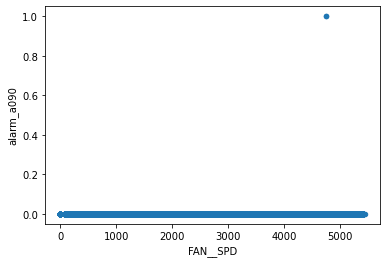

In [74]:
#Scatter plot to see relation between CHE_FIGN and CHE_SIGN
df3.plot(kind='scatter', x = 'FAN__SPD', y='alarm_a090');

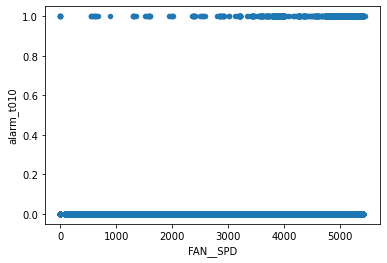

In [75]:
#Scatter plot to see relation between CHE_FIGN and FLAMECUR
df3.plot(kind='scatter', x = 'FAN__SPD', y='alarm_t010');

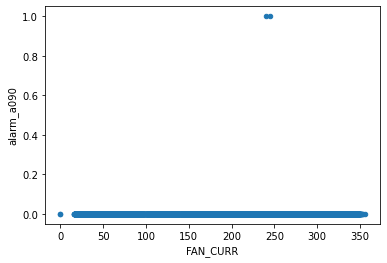

In [76]:
#Scatter plot to see relation between CHE_FIGN and CHE_SIGN
df3.plot(kind='scatter', x = 'FAN_CURR', y='alarm_a090');

In [77]:
df3.FAN__SPD.loc[df3.alarm_a090==1]

179702    4755
184480    4749
Name: FAN__SPD, dtype: int32

In [78]:
df3.FAN_CURR.loc[df3.alarm_a090==1]

179702    244.5
184480    240.8
Name: FAN_CURR, dtype: float64

In [ ]:
#Scatter plot to see relation between CHE_FIGN and T_HEALTH
df3.plot(kind='scatter', x = 'FAN_CURR', y='alarm_t010');